# Simulated Linear Regression

In this notebook, I showcase how to do a simple linear regression on a simulated data set. The idea is that we know the underlying function, create some test data from it, and then can extract the parameters for the original function from the test data.

## Constructing Simulated Data

For this demonstration, we choose the linear function, 

$$f(x) = 2 + 3x \ ,$$ 

which will be used to create some simulated data. To create the data set we import numpy and pandas, generate 100 random input points from a uniform distribution between $[-2,2)$, and then find the function's value for each point:

In [76]:
import numpy, pandas

x_values = numpy.random.uniform (low=-2, high=2, size=100)

output_values = 2 + 3 * x_values

test_data_naive = pandas.DataFrame({'input':x_values, 'output':output_values})

## display first five entries from the data set
test_data_naive [:5]

,input,output
0,0.136954,2.410862
1,-0.019569,1.941293
2,-1.851406,-3.554217
3,-1.209231,-1.627693
4,1.632492,6.897476


However just using these output values as our simulated data won't generate something instructive. Plotting the 100 values in a scatter and our underlying function as a red line, 

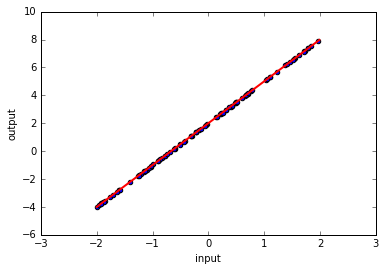

In [90]:
import matplotlib.pyplot as plt

def f(x):
    y = 2 + 3 * x
    return y

x_plot = numpy.arange(-2., 2, 0.01)

test_data_naive.plot(x='input', y='output', kind='scatter')
plt.plot(x_plot, f(x_plot), 'r', linewidth=2)
plt.show()

we see that we haven't masked that these values come from a linear function. To make something more realistic that one might actually encounter in everyday life, we need to add some random noise $\epsilon$, 

$$f(x)_{\text{ real}} = 2 + 3x + \epsilon \ .$$

To do this, let's generate 100 random values from a normal (Gaussian) distribution to get $\epsilon$ and plot the result:

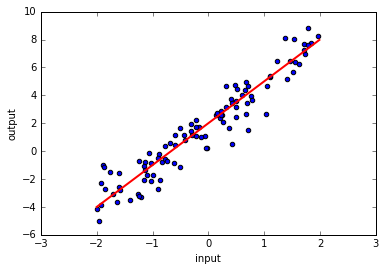

In [84]:
errors = numpy.random.normal (loc=0.0, scale=1.0, size=100)

simul_output = 2 + 3 * x_values + errors

test_data_real = pandas.DataFrame({"input":x_values, "output":simul_output})

test_data_real.plot(x='input', y='output', kind='scatter')
plt.plot(x_plot, f(x_plot), 'r', linewidth=2)
plt.show()

Much better! 

## Performing Linear Regression

Suppose we are now given this dataset of blue points (meaning a dataframe holding x_values and simul_output) and want to model it. Looking at it in a plot like above (and pretending we don't see the red line), we think that it could be well modelled by linear regression, that is,

$$y(x) = b_0 + b_1 x \ ,$$

where $y(x)$ is our prediction for a given input $x$ with $b_0$ and $b_1$ being our two parametric variables (y-intercept and slope respectively). The formulas for these two quantities are given by,

$$b_0 = \bar{y} - b_1 \bar{x} \ ,$$

$$b_1 = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{j=1}^n (x_j - \bar{x})^2} \ , $$

where $n$ is our total number of points (here 100) and $\bar{y}$ and $\bar{x}$ are our mean values for the simulated_data and x_values array respectively,

$$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i \ ,$$

$$\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i \ ,$$

In [87]:
xmean = sum(x_values) / x_values.size
ymean = sum(simul_output) / simul_output.size
print ('x mean is %f' % xmean)
print ('y mean is %f' % ymean)

x mean is -0.115472
y mean is 1.612258



Our $\bar{x}$ is close to zero as it should be expected given that we are drawing from a uniform distribution on the range $[-2,2)$. Consequently our $\bar{y}$ should then be in the vicinity of 2 which it is. Now we can go ahead and construct the two parameters in our fit:

In [88]:
b1_num = sum ((x_values - xmean) * (simul_output - ymean)) 
b1_den = sum ((x_values - xmean)**2)

b1 = b1_num / b1_den
b0 = ymean - b1 * xmean

print ('predicted b0 is %f' % b0)
print ('predicted b1 is %f' % b1)

predicted b0 is 1.951502
predicted b1 is 2.937889


The predicted values of $b_0$ and $b_1$ then define our linear fit. As can be seen, they are pretty close to the true values (2 and 3 respectively). Plotting our prediction as a green line, we see that it does a very good job of matching the underlying linear function.

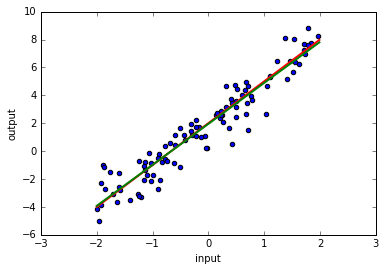

In [89]:
def prediction (x):
    y = b0 + b1 * x
    return y

test_data_real.plot(x='input', y='output', kind='scatter')
plt.plot(x_plot, f(x_plot), 'r', linewidth=2)
plt.plot(x_plot, prediction(x_plot), 'g', linewidth=2)
plt.show()